In [1]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv
import lmfit
from scipy import stats

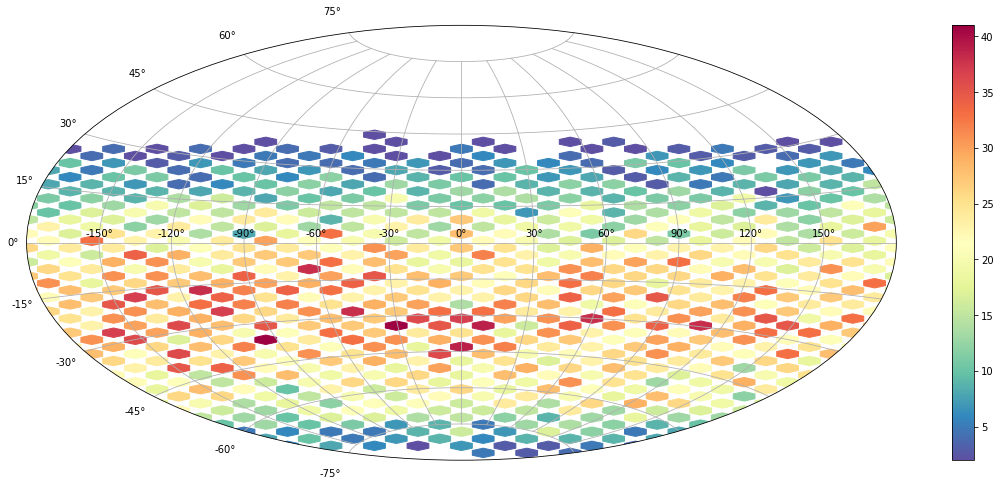

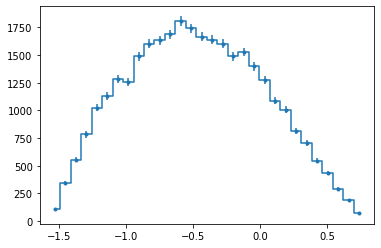

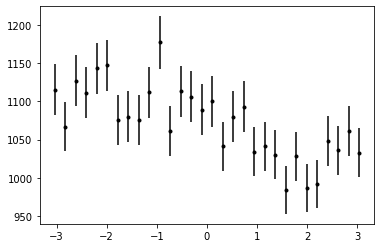

In [7]:
#Lets say we have
label='events_a8_1space.dat'

def rad(iTheta):
    return iTheta/180. * math.pi

def rad1(iTheta):
    return iTheta/180. * math.pi-math.pi

dec=np.array([])
ra=np.array([])
az=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile,delimiter=' ')
    for pRow in plots:
        if '#' in pRow[0] or pRow[0]=='':
            continue
        #print(pRow)
        #if float( pRow[2]) > 15:
        #    continue
        dec = np.append(dec,rad(float(pRow[2])))
        ra  = np.append(ra,rad1(float(pRow[3])))
        az  = np.append(az,rad(float(pRow[4])))

#coords = SkyCoord(l=x_list, b=y_list, unit='rad', frame="galactic")
#plt.subplot(111, projection='aitoff')
#plt.scatter(-coords.l.wrap_at('180d').radian, coords.b.radian, c=z_list, cmap='plasma', norm=colors.LogNorm(vmax=np.nanmax(z)))
#extent = [-math.pi,math.pi,ybnds[0],ybnds[1]] 
color_map = plt.cm.Spectral_r
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(111, projection='aitoff')
w=np.power(1./np.cos(dec+0.5),0) #ad-hoc
#image = plt.hist2d(ra, dec,weights=w,bins=10,density=True,cmap=plt.cm.jet)#,gridsize=40, mincnt=1)
#H, xedges, yedges = np.histogram2d(dec, ra,weights=w,bins=20)
#plt.imshow(H,extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]])
image = plt.hexbin(ra, dec, cmap=color_map,gridsize=40, mincnt=1,C=w,reduce_C_function=np.sum)
plt.colorbar()
plt.grid(True)
plt.show()

y0, bin_edges = np.histogram(dec,weights=w, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',drawstyle = 'steps-mid')
plt.show()

y0, bin_edges = np.histogram(ra,weights=w, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',linestyle = 'None', color = 'black')
plt.show()

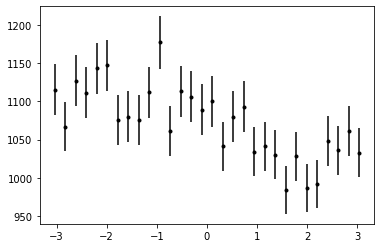

total/2
NLeft: 16600 +/- 128.84098726725125 NRight: 15587 +/- 124.84790747145104 None 16093.5


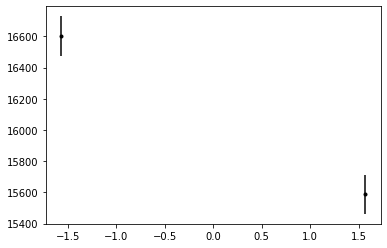

p-left 0.00036943129315803906 p-right 0.00032252051151133976 check 1.0


In [9]:
#Ok enough of having fun, lets look at the asymmetry we observe in right asecion
y0, bin_edges = np.histogram(ra, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',linestyle = 'None', color = 'black')
plt.show()

#even without corrections, we observe a clear asymmetry, lets look at the distribution of events between the two
#Lets say we have
NLeft=0
NRight=0
for i0 in range(len(ra)):
    if ra[i0] < 0:
        NLeft+=1
    else:
        NRight+=1
print("NLeft:",NLeft,"+/-",math.sqrt(NLeft),"NRight:",NRight,"+/-",math.sqrt(NRight),print("total/2"),len(ra)/2.)

y0, bin_edges = np.histogram(ra, bins=2)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',linestyle = 'None', color = 'black')
plt.show()

lamb=len(ra)/2.
pleft=stats.poisson.pmf(NLeft,lamb)
pright=stats.poisson.pmf(NRight,lamb)
pcheck=stats.poisson.pmf(int(lamb),lamb)

print("p-left",pleft/pcheck,"p-right",pright/pcheck,"check",pcheck/pcheck)


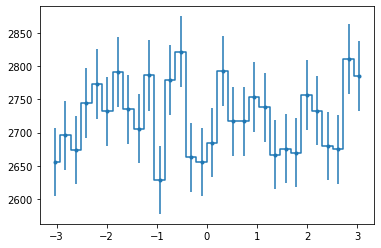

total/2
NLeft: 40843 +/- 202.0965115978007 NRight: 40858 +/- 202.13361917306088 None 40850.5


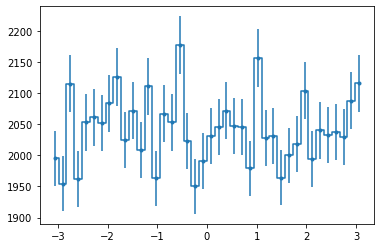

p-left 0.9994003979088298 p-right 0.9992170135352566 check 1.0


In [13]:
#Lets say we have
label='events_a4_1space.dat'

def rad(iTheta):
    return iTheta/180. * math.pi

def rad1(iTheta):
    return iTheta/180. * math.pi-math.pi

dec=np.array([])
ra=np.array([])
az=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile,delimiter=' ')
    for pRow in plots:
        if '#' in pRow[0] or pRow[0]=='':
            continue
        #print(pRow)
        #if float( pRow[2]) > 15:
        #    continue
        dec = np.append(dec,rad(float(pRow[2])))
        ra  = np.append(ra,rad1(float(pRow[3])))
        az  = np.append(az,rad(float(pRow[4])))
y0, bin_edges = np.histogram(ra, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',drawstyle = 'steps-mid')
plt.show()
        
NLeft=0
NRight=0
for i0 in range(len(ra)):
    if ra[i0] < 0:
        NLeft+=1
    else:
        NRight+=1
print("NLeft:",NLeft,"+/-",math.sqrt(NLeft),"NRight:",NRight,"+/-",math.sqrt(NRight),print("total/2"),len(ra)/2.)

y0, bin_edges = np.histogram(ra, bins=40)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',drawstyle = 'steps-mid')
plt.show()

lamb=len(ra)/2.
pleft=stats.poisson.pmf(NLeft,lamb)
pright=stats.poisson.pmf(NRight,lamb)
pcheck=stats.poisson.pmf(int(lamb),lamb)

print("p-left",pleft/pcheck,"p-right",pright/pcheck,"check",pcheck/pcheck)



Likelihood -160.85450815771514 2042.525 40
chi2 56.68374900339654
     fun: -160.8688049626717
    nfev: 39
     nit: 9
 success: True
       x: 2043.7334850248787 2042.525
     fun: 56.67392068651468
    nfev: 40
     nit: 9
 success: True
       x: 2043.2334238532474 2042.525


/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/pharris/Library/Python/3.7/lib/python/site-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


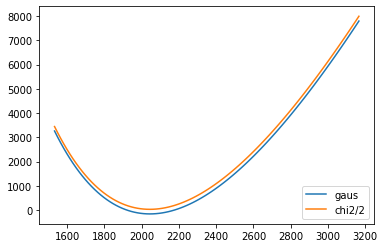

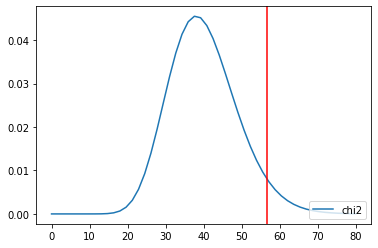

In [14]:
def loggaus(x):
    lTot=0
    for val in range(len(y0)):
        lTot = lTot+(0.5/(x+1e-5))*(y0[val]-x)**2
        lTot = lTot-0.5*np.log(math.pi*2*x)
    return lTot

def chi2(x):
    lTot=0
    for val in range(len(y0)):
        lTot = lTot+(1./(x+1e-5))*(y0[val]-x)**2
    return lTot


lamb=y0.mean()
print("Likelihood",loggaus(lamb),lamb,len(y0))
print("chi2",chi2(lamb))
x = np.linspace(lamb*0.75, lamb*1.55, 100)
plt.plot(x, loggaus(x),label='gaus');
plt.plot(x, chi2(x)/2.,label='chi2/2');
plt.legend(loc='lower right')
from scipy import optimize as opt
sol1=opt.minimize_scalar(loggaus, method='Brent')
print(sol1,lamb.mean())
sol2=opt.minimize_scalar(chi2, method='Brent')
print(sol2,lamb.mean())
plt.show()
#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2(lamb), c='red')
plt.legend(loc='lower right')

0.6826894921370859


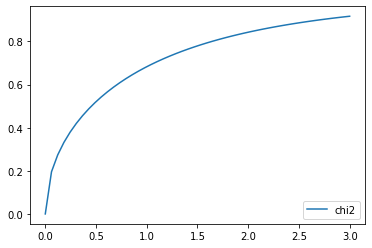

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 2050.4281798206534
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 2036.0639139044317
sol1 2049.670846695809
sol2 2035.3791533041915


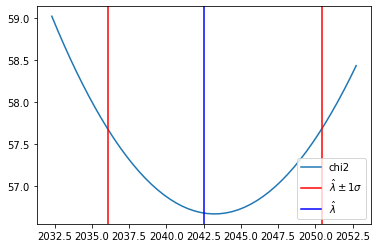

In [17]:
#print(stats.chi2.cdf(1,2),stats.chi2.cdf(2,2))
print(stats.chi2.cdf(1,1))
x = np.linspace(0,3)
chi2d=stats.chi2.cdf(x,1) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.legend(loc='lower right')
plt.show()

def chi2min(ival):
    minchi2=chi2(y0.mean())+1
    return chi2(ival)-minchi2

def quadratic(ival,ibase,imean,isol1,isol2):
    delta=(isol2.root-isol1.root)/2.
    out=1./delta/delta*(ival-imean)**2+ibase
    return out

sol1=opt.root_scalar(chi2min,bracket=[lamb, lamb*1.005],method='brentq')
sol2=opt.root_scalar(chi2min,bracket=[lamb*0.995, lamb],method='brentq')
print(sol1)
print(sol2)
print("sol1",y0.mean()+math.sqrt(y0.mean()/len(y0)))
print("sol2",y0.mean()-math.sqrt(y0.mean()/len(y0)))

lamb=y0.mean()
minlog=chi2(lamb)
x = np.linspace(lamb*0.995, lamb*1.005, 50)
plt.plot(x, chi2(x),label='chi2');
#plt.plot(x, quadratic(x,minlog,lamb,sol1,sol2),label='quadratic');
plt.axvline(sol1.root, c='red',label="$\hat{\lambda}\pm1\sigma$")
plt.axvline(lamb, c='blue',label="$\hat{\lambda}$")
plt.axvline(sol2.root, c='red')
plt.legend(loc='lower right')
#plt.legend(loc='lower right')
plt.show()


In [23]:
print(stats.chi2.cdf(4.3,3))

0.7691612517911242


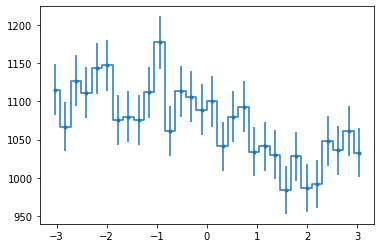

     fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578 1072.9


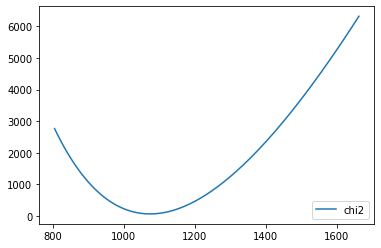

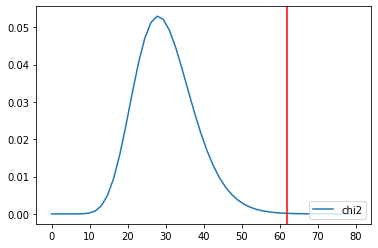

In [28]:
#Now lets look at the performance of chi^2 with the high energy data
#Lets say we have
label='events_a8_1space.dat'

dec=np.array([])
ra=np.array([])
az=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile,delimiter=' ')
    for pRow in plots:
        if '#' in pRow[0] or pRow[0]=='':
            continue
        #print(pRow)
        #if float( pRow[2]) > 15:
        #    continue
        dec = np.append(dec,rad(float(pRow[2])))
        ra  = np.append(ra,rad1(float(pRow[3])))
        az  = np.append(az,rad(float(pRow[4])))
y0, bin_edges = np.histogram(ra, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',drawstyle = 'steps-mid')
plt.show()
        
lamb=y0.mean()
x = np.linspace(lamb*0.75, lamb*1.55, 100)
plt.plot(x, chi2(x),label='chi2');
plt.legend(loc='lower right')
from scipy import optimize as opt
sol2=opt.minimize_scalar(chi2, method='Brent')
print(sol2,lamb.mean())
plt.show()
#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,30) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2(lamb), c='red')
plt.legend(loc='lower right')


     fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1080.0202465349328
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1067.8772337950377
sol1 1078.880245256955
sol2 1066.9197547430451


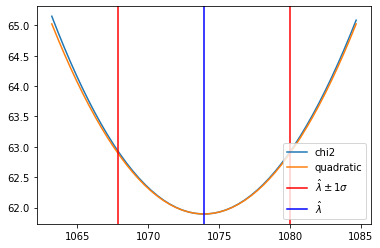

In [26]:
sol0=opt.minimize_scalar(chi2, method='Brent')
lamb=sol0.x
sol1=opt.root_scalar(chi2min,bracket=[lamb, lamb*1.01],method='brentq')
sol2=opt.root_scalar(chi2min,bracket=[lamb*0.99, lamb],method='brentq')
print(sol0)
print(sol1)
print(sol2)
print("sol1",y0.mean()+math.sqrt(y0.mean()/len(y0)))
print("sol2",y0.mean()-math.sqrt(y0.mean()/len(y0)))

minlog=chi2(lamb)
x = np.linspace(lamb*0.99, lamb*1.01, 50)
plt.plot(x, chi2(x),label='chi2');
plt.plot(x, quadratic(x,minlog,lamb,sol1,sol2),label='quadratic');
plt.axvline(sol1.root, c='red',label="$\hat{\lambda}\pm1\sigma$")
plt.axvline(lamb, c='blue',label="$\hat{\lambda}$")
plt.axvline(sol2.root, c='red')
plt.legend(loc='lower right')
#plt.legend(loc='lower right')
plt.show()


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 30
    # variables        = 1
    chi-square         = 62.0646320
    reduced chi-square = 2.14015973
    Akaike info crit   = 23.8093674
    Bayesian info crit = 25.2105648
[[Variables]]
    a:  1070.83118 +/- 8.74023221 (0.82%) (init = 1000)
odict_items([('a', <Parameter 'a', value=1070.8311789292245 +/- 8.74, bounds=[-inf:inf]>)]) 1070.8311789292245


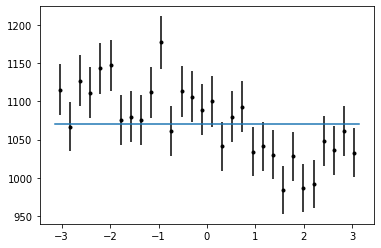

In [27]:
def f(x,a):
    return a

y0, bin_edges = np.histogram(ra, bins=30)
xweights=np.array([])
x=np.array([])
y=np.array([])
for i0 in range(len(y0)):
    pVal = y0[i0]
    pX = float(bin_centers[i0])
    x = np.append(x,float(pX))
    y = np.append(y,float(pVal))
    pWeight = 1./math.sqrt(pVal)
    xweights = np.append(xweights,pWeight)
model  = lmfit.Model(f)
p = model.make_params(a=1000)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
print(result.params.items(),result.params["a"].value)
plt.errorbar(bin_centers,y0,yerr=y0**0.5,c='black',marker='.',linestyle = 'None')
x = np.linspace(bin_edges[0],bin_edges[-1], 50)
y=np.array([])
for pX in x:
    pOut=f(pX,result.params["a"].value)
    y=np.append(y,pOut)
plt.plot(x,y)

In [31]:
print(1-stats.chi2.cdf(62.0646320,30))

0.0005140855263460198


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 30
    # variables        = 2
    chi-square         = 26.8040965
    reduced chi-square = 0.95728916
    Akaike info crit   = 0.62072051
    Bayesian info crit = 3.42311528
[[Variables]]
    a:  1072.00653 +/- 5.84870422 (0.55%) (init = 1000)
    b: -50.0226479 +/- 8.24221274 (16.48%) (init = 10)


<Figure size 432x288 with 0 Axes>

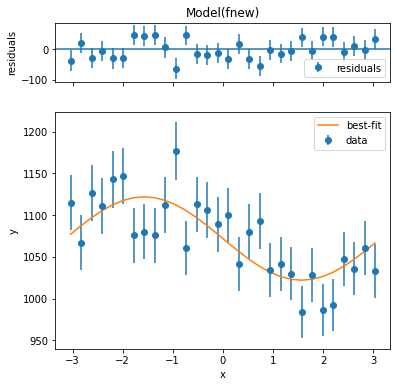

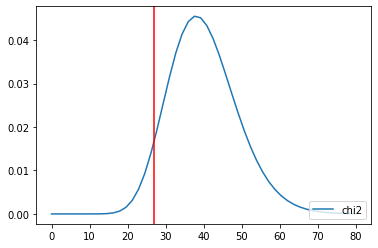

In [32]:
def fnew(x,a,b):
    pVal=b*np.sin(x)
    return a+pVal

x=np.array([])
y=np.array([])
xweights=np.array([])
for i0 in range(len(y0)):
    pVal = y0[i0]
    pX = float(bin_centers[i0])
    x = np.append(x,float(pX))
    y = np.append(y,float(pVal))
    pWeight = 1./math.sqrt(pVal)
    xweights = np.append(xweights,pWeight)

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=10)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(result.chisqr, c='red')
plt.legend(loc='lower right')



In [34]:
print(stats.chi2.cdf(26.8040965,30))

0.36646148428517894


      fun: 26.771997460728183
 hess_inv: array([[17.40034693, -0.50416445],
       [-0.50416445, 35.95279697]])
      jac: array([-2.62260437e-06, -4.52995300e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([1073.34616093,  -50.46127062])
0.3934693402873665
0.6833632306209467 0.6826894921370859


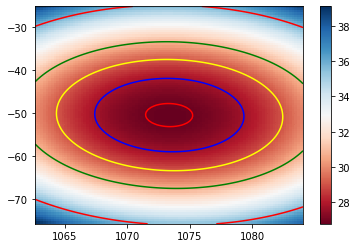

-1.0
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1080.0202465349328      fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578 1D Uncertainty: 5.978245804211383
Reminder the Poission uncertianty would be: 5.180121043307706


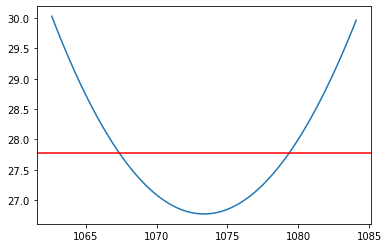

-1.0
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1080.0202465349328      fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578 1D Uncertainty: 8.505827129594543


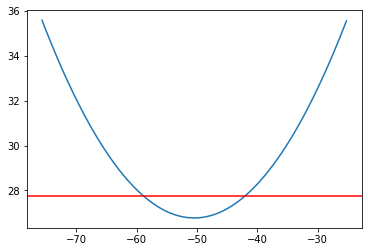

In [35]:
#Now our chi by eye looks good. Also the chi2 value is in our wheelhouse, so this looks like a good fit
#Additionally we see now that we have two parameters with uncertainties, lets try to do the computation by hand
def chi2(x):
    lTot=0
    for val in range(len(y0)):
        xtest=fnew(bin_centers[val],x[0],x[1])
        lTot = lTot+(1./(xtest+1e-5))*(y0[val]-xtest)**2
    return lTot

x0 = np.array([1000,10])
ps = [x0]
sol=opt.minimize(chi2, x0)
print(sol)
plt.show()
#Look the same answers, now lets plot the chi2
x = np.linspace(sol.x[0]*0.99,sol.x[0]*1.01, 100)
y = np.linspace(sol.x[1]*0.5,sol.x[1]*1.5, 100)
X, Y = np.meshgrid(x, y)
print(stats.chi2.cdf(1,2))
print(stats.chi2.cdf(2.30,2),stats.chi2.cdf(1,1))
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
Z = np.array([chi2([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
#for pX in X:
#    for pY in y:
#x**2 + 100*Y**2
#plt.colormesh(X, Y, Z, cmap=cmap, norm=norm)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()

#Now lets fix one parameter at the minimum, and profile the other
plt.plot(x, chi2([x,sol.x[1]]),label='chi2');
plt.axhline(sol.fun+1, c='red')
#from the intercepts, we can get the uncertainties
def chi2minX(xval):
    val=chi2([xval,sol.x[1]])
    minval=chi2(sol.x)+1
    return val-minval
print(chi2minX(sol.x[0]))
solX1=opt.root_scalar(chi2minX,bracket=[sol.x[0], sol.x[0]*1.02],method='brentq')
solX2=opt.root_scalar(chi2minX,bracket=[sol.x[0]*0.98, sol.x[0]],method='brentq')
print(sol1,sol2,"1D Uncertainty:",abs(solX2.root-solX1.root)/2.)
print("Reminder the Poission uncertianty would be:",math.sqrt(sol.x[0]/40))
plt.show()

#Now for the other parameter
plt.plot(y, chi2([sol.x[0],y]),label='chi2');
plt.axhline(sol.fun+1, c='red')
def chi2minY(yval):
    val=chi2([sol.x[0],yval])
    minval=chi2(sol.x)+1
    return val-minval
print(chi2minY(sol.x[1]))
solY1=opt.root_scalar(chi2minY,bracket=[sol.x[1],    sol.x[1]*1.2],method='brentq')
solY2=opt.root_scalar(chi2minY,bracket=[sol.x[1]*0.8, sol.x[1]],method='brentq')
print(sol1,sol2,"1D Uncertainty:",abs(solY2.root-solY1.root)/2.)
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 30
    # variables        = 2
    chi-square         = 29.8718324
    reduced chi-square = 1.06685116
    Akaike info crit   = 3.87155779
    Bayesian info crit = 6.67395255
[[Variables]]
    a:  1053.22719 +/- 6.95345272 (0.66%) (init = 1000)
    b:  1071.90427 +/- 6.17403788 (0.58%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) =  0.872


<Figure size 432x288 with 0 Axes>

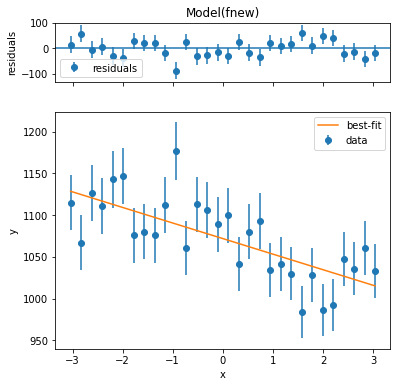

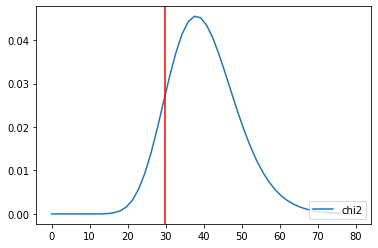

In [36]:
def fnew(x,a,b):
    pVal=b*(1-x)
    return a*x+pVal

x=np.array([])
y=np.array([])
xweights=np.array([])
for i0 in range(len(y0)):
    pVal = y0[i0]
    pX = float(bin_centers[i0])
    x = np.append(x,float(pX))
    y = np.append(y,float(pVal))
    pWeight = 1./math.sqrt(pVal)
    xweights = np.append(xweights,pWeight)

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=10)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(result.chisqr, c='red')
plt.legend(loc='lower right')


      fun: 29.990341147697194
 hess_inv: array([[22.59365336, 17.34746638],
       [17.34746638, 17.52573421]])
      jac: array([-4.76837158e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 13
     njev: 15
   status: 0
  success: True
        x: array([1054.703102  , 1073.39984514])


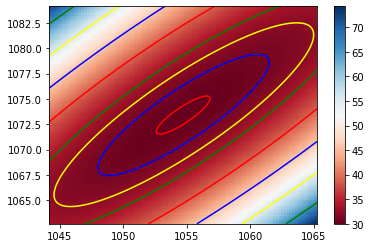

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1080.0202465349328      fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578 1D Uncertainty: 3.305487112159881
Reminder the Poission uncertianty would be: 5.134936956759408


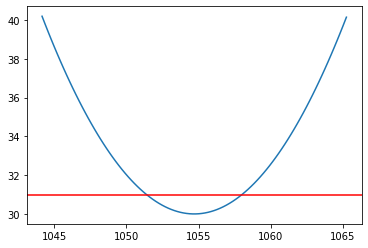

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1080.0202465349328      fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578 1D Uncertainty: 2.9322206951109138


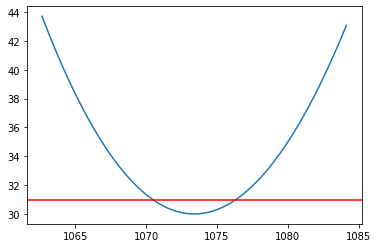

In [37]:
x0 = np.array([1000,1000])
ps = [x0]
sol=opt.minimize(chi2, x0)
print(sol)

x = np.linspace(sol.x[0]*0.99,sol.x[0]*1.01, 100)
y = np.linspace(sol.x[1]*0.99,sol.x[1]*1.01, 100)
X, Y = np.meshgrid(x, y)

levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun

Z = np.array([chi2([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()

#Now lets fix one parameter at the minimum, and profile the other
plt.plot(x, chi2([x,sol.x[1]]),label='chi2');
plt.axhline(sol.fun+1, c='red')
#from the intercepts, we can get the uncertainties
solX1=opt.root_scalar(chi2minX,bracket=[sol.x[0], sol.x[0]*1.02],method='brentq')
solX2=opt.root_scalar(chi2minX,bracket=[sol.x[0]*0.98, sol.x[0]],method='brentq')
print(sol1,sol2,"1D Uncertainty:",abs(solX2.root-solX1.root)/2.)
print("Reminder the Poission uncertianty would be:",math.sqrt(sol.x[0]/40))
plt.show()

#Now for the other parameter
plt.plot(y, chi2([sol.x[0],y]),label='chi2');
plt.axhline(sol.fun+1, c='red')
solY1=opt.root_scalar(chi2minY,bracket=[sol.x[1],    sol.x[1]*1.2],method='brentq')
solY2=opt.root_scalar(chi2minY,bracket=[sol.x[1]*0.8, sol.x[1]],method='brentq')
print(sol1,sol2,"1D Uncertainty:",abs(solY2.root-solY1.root)/2.)
plt.show()



[[6.72215045 5.89024047]
 [5.89024047 5.92042806]]
values [75.18250443  5.0562707 ] vectors [[ 0.75648432 -0.65401183]
 [ 0.65401183  0.75648432]]
c(a,b) -0.8645411684563379
A deceptively wrong way to get correlation: 0.7678026261640956


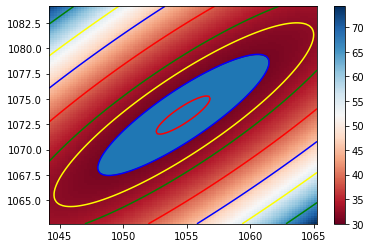

In [38]:
print(np.sqrt(2*sol.hess_inv))
#The diagonals are the uncertainty lmfit quotes
#Really the best way to do this is to get the eigen values
import numpy.linalg as la
w, v=la.eig(2*sol.hess_inv)
print("values",w,"vectors",v)
#Now lets get the correlation C(a,b) (see below)
print("c(a,b)",v[0,1]/v[0,0])
print("A deceptively wrong way to get correlation:",sol.hess_inv[0,1]/sol.hess_inv[0,0])

from matplotlib.patches import Ellipse
#Lets plot this guy
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """
    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,angle=np.degrees(theta), **kwargs)

err_ellipse=get_cov_ellipse(2*sol.hess_inv,sol.x,1)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
ax.add_artist(err_ellipse)
plt.show()

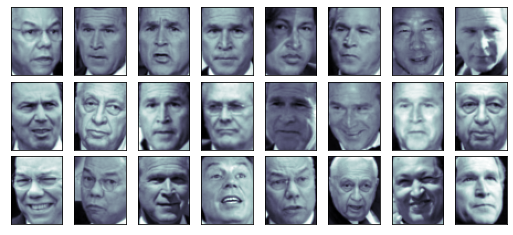

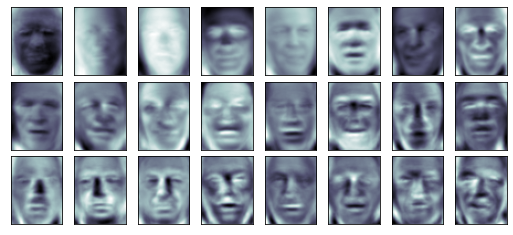

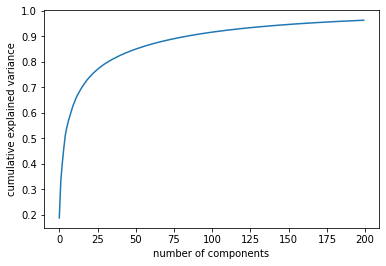

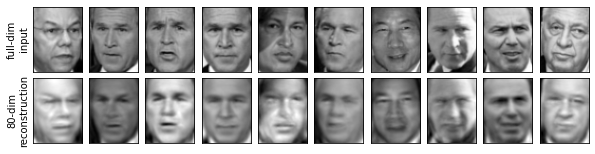

In [40]:
#Finally, I would like to say that this method of finding the ellipse is our first deep learning method
#This procedure of computing the covariance matrix, and finding the eigenvectors is known as 
#principle component analysis or PCA. Lets run it on our example and look
#From https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
#from sklearn.decomposition import PCA
#X=(np.vstack([lAs,lBs])).T
#pca = PCA(n_components=2)
#pca.fit(X)
#print(pca.components_)
#print(pca.explained_variance_)
#print("Old Eigen","values",w,"vectors",v)

#def draw_vector(v0, v1, ax=None):
#    ax = ax or plt.gca()
#    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
#    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
#plt.scatter(lAs, lBs, alpha=0.2)
#for length, vector in zip(pca.explained_variance_, pca.components_):
#    v = vector * 3 * np.sqrt(length)
#    draw_vector(pca.mean_, pca.mean_ + v)
#plt.axis('equal');

#Now lets do it ML style for fun
#Load some faces of images
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
#Lets plot the eigenvectors
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')
    
#Fit them to PCA 
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(200)
pca.fit(faces.data)
fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
#Lets plot the eigenvectors
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
plt.show()
    
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

# Compute the components and projected faces
pca = RandomizedPCA(80).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('80-dim\nreconstruction');